# Numpy and Matplotlib Example
Prepared by: Nickolas Freeman, Ph.D.

This notebook covers some basic operations in `numpy` and `matplotlib` that we will be expanding on as we look at  methods for supplier selection.  First, we import the stated libraries and set some parameters for matplotlib.

In [1]:
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams.update({'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

# Array Creation
The following code block shows how to create a `numpy` array using a Python list object.

In [2]:
arr = np.array([1,2,3,4,5,6,7,8,9,10,11,12])
print(arr)

[ 1  2  3  4  5  6  7  8  9 10 11 12]


The following code block shows how to create a `numpy` array using the `numpy` `arange` method.

In [3]:
arr = np.arange(1,13)
print(arr)

[ 1  2  3  4  5  6  7  8  9 10 11 12]


Reshape allows us to manipulate arrays into new shapes

In [4]:
arr = arr.reshape(3,4)
print(arr)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


# Array Operations

Several methods are defined in the `numpy` library that allow us to perform mathematical operations on `numpy` arrays. The following code block shows how the `sum` method may be used with no arguments to add together all elements of an array.

In [5]:
arr.sum()

78

Specifying an axis allows us to sum accross columns (axis=1) and rows (axis=0).

In [6]:
print('The column sums (i.e., summing each row across the columns) are:')
print(arr.sum(axis=1))

print('\nThe row sums (i.e., summing each column across the rows) are:')
print(arr.sum(axis=0))

The column sums (i.e., summing each row across the columns) are:
[10 26 42]

The row sums (i.e., summing each column across the rows) are:
[15 18 21 24]


We can use scalars to perform operations on all elements in an array at one time.

In [7]:
arr*2

array([[ 2,  4,  6,  8],
       [10, 12, 14, 16],
       [18, 20, 22, 24]])

The `**` operator is used for exponentiation.

In [8]:
arr**2

array([[  1,   4,   9,  16],
       [ 25,  36,  49,  64],
       [ 81, 100, 121, 144]], dtype=int32)

In [9]:
np.power(arr,2)

array([[  1,   4,   9,  16],
       [ 25,  36,  49,  64],
       [ 81, 100, 121, 144]], dtype=int32)

You can also apply more advanced methods across the various axes

In [10]:
print("The variance of the values in each column are:")
print(arr.var(axis=0))

print("\nThe maximum values in each column are:")
print(arr.max(axis=0))

print("\nThe (row) indices of the maximum value in each column are:")
print(arr.argmax(axis=0))

print("\nThe cumulative sums across the rows are:")
print(arr.cumsum(axis=0))

print("\nThe cumulative sums across the columns are:")
print(arr.cumsum(axis=1))

The variance of the values in each column are:
[ 10.66666667  10.66666667  10.66666667  10.66666667]

The maximum values in each column are:
[ 9 10 11 12]

The (row) indices of the maximum value in each column are:
[2 2 2 2]

The cumulative sums across the rows are:
[[ 1  2  3  4]
 [ 6  8 10 12]
 [15 18 21 24]]

The cumulative sums across the columns are:
[[ 1  3  6 10]
 [ 5 11 18 26]
 [ 9 19 30 42]]


You can also use conditional statements to return *boolean* arrays that can be used to perform specialized calculations.

In [11]:
print('Which position of the arr object have values greater than 5?')
arr>5

print('\nWhat is the sum of the squared array values that exceed five?')
print(np.power(arr[arr>5],2).sum())

Which position of the arr object have values greater than 5?

What is the sum of the squared array values that exceed five?
595


The following code block shows how to perform operations that mimic Excel's `sumproduct` function. 

In [12]:
arr1 = np.random.poisson(7,size=10)
print('The first array is:')
print(arr1)

arr2 = np.random.choice(a=[1.1, 1.2, 1.3],size=10, p=[0.2, 0.3, 0.5])
print('\nThe second array is:')
print(arr2)

print('\nThe element-wise product of the arrays is:')
print(arr1*arr2)

print('\nThe first method of computing the sumproduct yields:')
print(np.sum(arr1*arr2))

print('\nThe second method of computing the sumproduct yields:')
print(np.dot(arr1,arr2))

The first array is:
[ 9 10 14  9 11  4  4  6  4  5]

The second array is:
[ 1.3  1.2  1.3  1.3  1.1  1.3  1.3  1.3  1.2  1.1]

The element-wise product of the arrays is:
[ 11.7  12.   18.2  11.7  12.1   5.2   5.2   7.8   4.8   5.5]

The first method of computing the sumproduct yields:
94.2

The second method of computing the sumproduct yields:
94.2


Aside from its extensive computing functionality, `numpy` is very fast. The following code block computes the average time for generating a list of 10,000 numbers following a Normal distribution using Python lists.

In [13]:
%%timeit

demand = []
for i in range(10000):
    demand.append(np.random.normal(100,10,1))

54.5 ms ± 7.75 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


The following code block performs the same task using `numpy` and provides a substantial speed improvement. **Note, 1 ms = 1000 $\mu$s**

In [14]:
%%timeit 

demand = np.random.normal(100,10,10000)

594 µs ± 18.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### Caveat: Assigning Existing Array to New Object

In this subsection, I demonstrate a somewhat counterintuitive issue that can arise when making assignments using `numpy` arrays, and other python objects. At first glance, the following code block appears to copy the cntents of `arr` into a new object alled `arr2`.

In [15]:
arr2 = arr
print(arr2)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


Suppose we change one of the values in `arr2` as shown below.

In [16]:
arr2[0,0]=100
print(arr2)

[[100   2   3   4]
 [  5   6   7   8]
 [  9  10  11  12]]


If we now print the original `arr`object, we will see that our assignment to `arr2` actually occurred in the `arr` object as well.

In [17]:
print(arr)

[[100   2   3   4]
 [  5   6   7   8]
 [  9  10  11  12]]


The 'extra copying' that we seem to have observed is not a bug. When we assigned the `arr` object to `arr2`, we just created a pointer that allows us to access the `arr` object via the `arr2` object. As a result, anything we do to `arr2` is actually being done to `arr`. The following code block shows how to use the `copy()` method to avoid the issue. 

In [18]:
arr = np.arange(1,13).reshape(3,4)

print('The original arr object is:')
print(arr)

arr2 = arr.copy()
print('\nThe original arr2 object is:')
print(arr2)

arr2[0,0]=100
print('\nThe updated arr2 object is:')
print(arr2)

print('\nAfter updating arr2, the arr object is:')
print(arr)

The original arr object is:
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]

The original arr2 object is:
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]

The updated arr2 object is:
[[100   2   3   4]
 [  5   6   7   8]
 [  9  10  11  12]]

After updating arr2, the arr object is:
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


# *Broadcasting*

In `numpy`, the term broadcasting describes how `numpy` treats arrays with different shapes during arithmetic operations. Specifically, subject to certain constraints, the smaller array is "broadcast" across the larger array so that they have compatible shapes.

In this section, we look at a simple example to provide a basic illustration of `numpy`'s broadcasting capabilities.

In [19]:
arr = np.arange(1,13).reshape(3,4)
arr2 = np.ones(4)
print('The original arr object is:')
print(arr)

print('\nThe original arr2 object is:')
print(arr2)

The original arr object is:
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]

The original arr2 object is:
[ 1.  1.  1.  1.]


If  we add the two array objects,  `numpy` 'broadcasts the smaller array over the larger. In this, case, adding the single row `arr2` object to each row of the larger `arr` object.

In [20]:
arr+arr2

array([[  2.,   3.,   4.,   5.],
       [  6.,   7.,   8.,   9.],
       [ 10.,  11.,  12.,  13.]])

If we were to reduce the length of the `arr2` object by 1, the broadcasting operation will fail. To see this, the following code block make the described modification to the `arr2` object and attempt to execute the sum in a `try-except` block. The operation fails, thus the exception is printed.

In [21]:
arr2 = np.ones(3)

try:
    arr+arr2
except:
    print('The operation failed!')

The operation failed!


The following code block demonstrates how the `newaxis` method can be used to make the operation that failed in the previous cell work.

In [22]:
arr = np.arange(1,13).reshape(3,4)
arr2 = np.ones(3)
print('The original arr object is:')
print(arr)

print('\nThe original arr2 object is:')
print(arr2)

arr2 = arr2[:,np.newaxis]
print('\nThe modified arr2 object is:')
print(arr2)

print('\nThe sum  of the two objects is:')
print(arr + arr2)

The original arr object is:
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]

The original arr2 object is:
[ 1.  1.  1.]

The modified arr2 object is:
[[ 1.]
 [ 1.]
 [ 1.]]

The sum  of the two objects is:
[[  2.   3.   4.   5.]
 [  6.   7.   8.   9.]
 [ 10.  11.  12.  13.]]


The following code block demonstrates how the `reshape` method can be used to achieve the same goal.

In [23]:
arr = np.arange(1,13).reshape(3,4)
arr2 = np.ones(3)
print('The original arr object is:')
print(arr)

print('\nThe original arr2 object is:')
print(arr2)

arr2 = arr2.reshape(3,1)
print('\nThe modified arr2 object is:')
print(arr2)

print('\nThe sum  of the two objects is:')
print(arr + arr2)

The original arr object is:
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]

The original arr2 object is:
[ 1.  1.  1.]

The modified arr2 object is:
[[ 1.]
 [ 1.]
 [ 1.]]

The sum  of the two objects is:
[[  2.   3.   4.   5.]
 [  6.   7.   8.   9.]
 [ 10.  11.  12.  13.]]


# Random Number Generation

We will use an example to illustrate `numpy`'s random number generation capabilities. Suppose we want to simulate the lead time for a part ordered from an external supplier. The lead time consist of three components: 1) the time needed to generate the order, 2) the time needed for the supplier to make the order, and 3) the transit time needed for the order to arrive.  Assume that each component of the lead time is uncertain, and follows a distribution that is known. We want to simulate each component to approximate the convolution that describes the distribution for the overall lead time.

The following code block specifies the sample size that we will use in the simulation.

** The probability distribution of the sum of two or more independent random variables is the convolution of their individual distributions.**

In [24]:
sample_size = 100000

The following code block demonstrates the use of the `choice` method from `numpy`'s `random` module to define a custom discrete probability dstribution for the order generation time. The code block actually creates the array or order generation times three times to show that the arrays for each creation differ.

In [25]:
support = [1, 2, 3, 4, 5]
probabilities = [0.3, 0.2, 0.1, 0.1, 0.3]

order_generation_time = np.random.choice(support,
                                         size=sample_size,
                                         p=probabilities)

print('In the first array of order generation times, the proportion of 5\'s is:')
print(np.count_nonzero(order_generation_time[order_generation_time==5])/sample_size)

order_generation_time = np.random.choice(support,
                                         size=sample_size,
                                         p=probabilities)

print('\nIn the second array of order generation times, the proportion of 5\'s is:')
print(np.count_nonzero(order_generation_time[order_generation_time==5])/sample_size)

order_generation_time = np.random.choice(support,
                                         size=sample_size,
                                         p=probabilities)

print('\nIn the third array of order generation times, the proportion of 5\'s is:')
print(np.count_nonzero(order_generation_time[order_generation_time==5])/sample_size)

In the first array of order generation times, the proportion of 5's is:
0.2993

In the second array of order generation times, the proportion of 5's is:
0.29793

In the third array of order generation times, the proportion of 5's is:
0.29878


The following code block shows how we can use the `RandomState()` method to generate consistent arrays of order generation times.

In [26]:
support = [1, 2, 3, 4, 5]
probabilities = [0.3, 0.2, 0.1, 0.1, 0.3]

order_generation_time = np.random.RandomState(42).choice(support,
                                         size=sample_size,
                                         p=probabilities)

print('In the first array of order generation times, the proportion of 5\'s is:')
print(np.count_nonzero(order_generation_time[order_generation_time==5])/sample_size)

order_generation_time = np.random.RandomState(42).choice(support,
                                         size=sample_size,
                                         p=probabilities)

print('\nIn the second array of order generation times, the proportion of 5\'s is:')
print(np.count_nonzero(order_generation_time[order_generation_time==5])/sample_size)

order_generation_time = np.random.RandomState(42).choice(support,
                                         size=sample_size,
                                         p=probabilities)

print('\nIn the third array of order generation times, the proportion of 5\'s is:')
print(np.count_nonzero(order_generation_time[order_generation_time==5])/sample_size)

In the first array of order generation times, the proportion of 5's is:
0.29889

In the second array of order generation times, the proportion of 5's is:
0.29889

In the third array of order generation times, the proportion of 5's is:
0.29889


The following code block shows how `numpys`'s `random` module may be used to generate an array of order make times that follow a Normal distribution. 

** Note that we use the `np.maximum` function to ensure that all values are positive.**

In [27]:
order_make_time = np.random.RandomState(42).normal(10,4,sample_size)

order_make_time = np.maximum(order_make_time,0)

Finally, the following code block shows how `numpys`'s `random` module may be used to generate an array of order make times that follow a Triangular distribution. 

In [28]:
order_transit_time = np.random.RandomState(42).triangular(5,10,25,sample_size)

The following code block adds the arrays for the various time components, yielding an array of simulated lead time values.

In [29]:
lead_time = order_generation_time + order_make_time + order_transit_time

The following code block illustrates how the `np.histogram` method works. In particular, note that the histogram method returns two objects, the first of which specifies the frequency for which lead time values occur in each of the bins and the second which specifies the edges for the bins.

In [30]:
np.histogram(lead_time,bins=np.arange(lead_time.max()+2))

(array([   0,    0,    0,    0,    0,    0,    7,   24,   80,  169,  315,
         479,  722, 1102, 1521, 2055, 2593, 3255, 3829, 4200, 4835, 5038,
        5204, 5222, 5100, 5108, 4932, 4732, 4561, 4375, 4156, 3876, 3730,
        3408, 3178, 2759, 2288, 1903, 1519, 1116,  818,  653,  417,  311,
         167,  112,   61,   38,   21,   10,    0,    1,    0], dtype=int64),
 array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
         22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
         33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
         44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.]))

The following code block shows that we may assign the two objects returned by the `np.histogram` function to named objects that can be referenced later. Also, we use the `density` argument to convert the frequencies to proportions.

In [31]:
hist, bin_edges = np.histogram(lead_time,
                               bins=np.arange(lead_time.max()+2),
                               density=True
                              )

print('The hist object follows:')
print(hist)

print('Note that the hist object has {} entries!'.format(hist.size))

print('\nThe bin_edges object follows:')
print(hist)

print('Note that the bin_edges object has {} entries!'.format(bin_edges.size))

The hist object follows:
[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   7.00000000e-05   2.40000000e-04
   8.00000000e-04   1.69000000e-03   3.15000000e-03   4.79000000e-03
   7.22000000e-03   1.10200000e-02   1.52100000e-02   2.05500000e-02
   2.59300000e-02   3.25500000e-02   3.82900000e-02   4.20000000e-02
   4.83500000e-02   5.03800000e-02   5.20400000e-02   5.22200000e-02
   5.10000000e-02   5.10800000e-02   4.93200000e-02   4.73200000e-02
   4.56100000e-02   4.37500000e-02   4.15600000e-02   3.87600000e-02
   3.73000000e-02   3.40800000e-02   3.17800000e-02   2.75900000e-02
   2.28800000e-02   1.90300000e-02   1.51900000e-02   1.11600000e-02
   8.18000000e-03   6.53000000e-03   4.17000000e-03   3.11000000e-03
   1.67000000e-03   1.12000000e-03   6.10000000e-04   3.80000000e-04
   2.10000000e-04   1.00000000e-04   0.00000000e+00   1.00000000e-05
   0.00000000e+00]
Note that the hist object has 53 entries!

The bin_edges ob

The following code block shows how the objects created from the `np.histogram` method may be used to plot the distribution for the lead time. An important thing to note is that the first argument of the `bar` method is a sequnce of scalars that represent the centers for the bars. We pass the bin edges for this sequence, but use the `[:-1]` slicing notation to include all but the last value. This is necessary so that the number of bars we specifiy matches the number of heights specified in the `hist` object (notice in previous code block that the two arrays differ in size). 

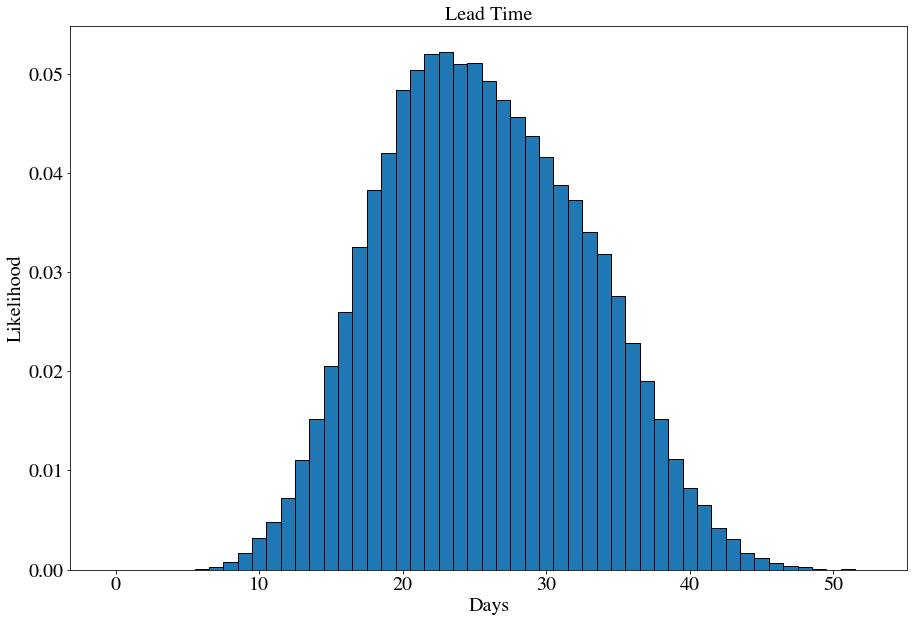

In [32]:
fig, ax = plt.subplots(1, 1, figsize = (15,10))

ax.bar(bin_edges[:-1], hist, width = 1, edgecolor='k')
ax.set_title('Lead Time',fontsize = 20)
ax.set_xlabel('Days',fontsize = 20)
ax.set_ylabel('Likelihood',fontsize = 20)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
plt.show() 

The following code block shows how to use sublots to visualize the distributions for all three components and the lead time simultaneously.

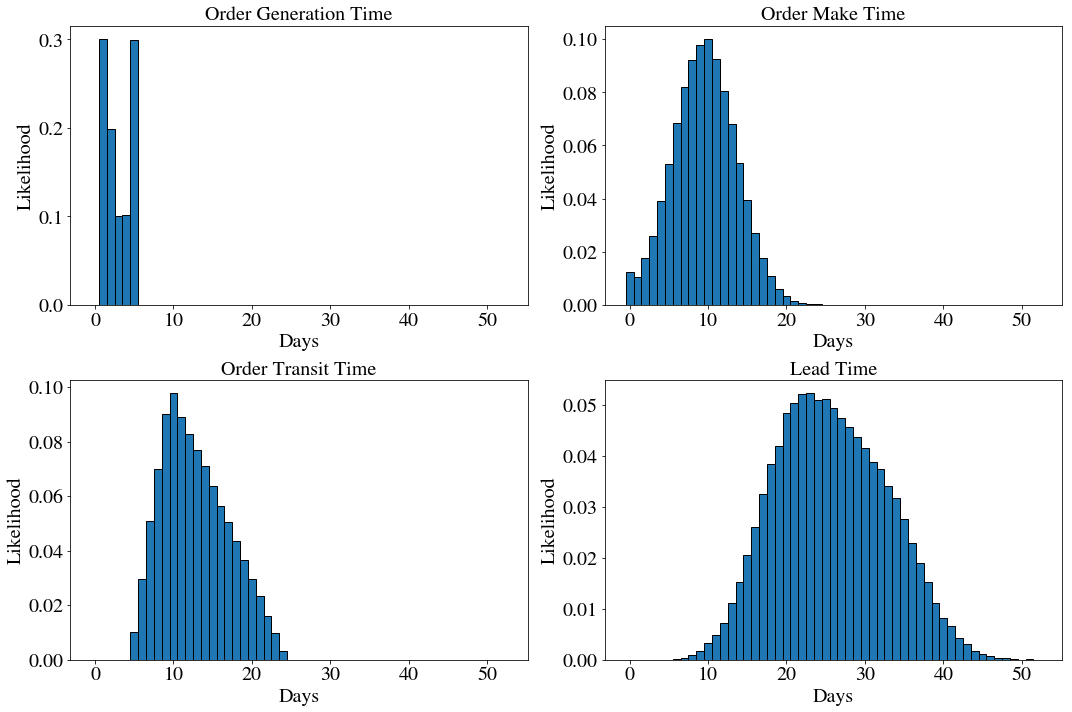

In [33]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize = (15,10))

############################################
hist, bin_edges = np.histogram(order_generation_time,
                               bins=np.arange(lead_time.max()+2),
                               density=True
                              )

ax1.bar(bin_edges[:-1], hist, width = 1, edgecolor='k')
ax1.set_title('Order Generation Time',fontsize = 20)
ax1.set_xlabel('Days',fontsize = 20)
ax1.set_ylabel('Likelihood',fontsize = 20)
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)

############################################
hist, bin_edges = np.histogram(order_make_time,
                               bins=np.arange(lead_time.max()+2),
                               density=True
                              )

ax2.bar(bin_edges[:-1], hist, width = 1, edgecolor='k')
ax2.set_title('Order Make Time',fontsize = 20)
ax2.set_xlabel('Days',fontsize = 20)
ax2.set_ylabel('Likelihood',fontsize = 20)
ax2.xaxis.set_tick_params(labelsize=20)
ax2.yaxis.set_tick_params(labelsize=20)

############################################
hist, bin_edges = np.histogram(order_transit_time,
                               bins=np.arange(lead_time.max()+2),
                               density=True
                              )

ax3.bar(bin_edges[:-1],hist, width = 1, edgecolor='k')
ax3.set_title('Order Transit Time',fontsize = 20)
ax3.set_xlabel('Days',fontsize = 20)
ax3.set_ylabel('Likelihood',fontsize = 20)
ax3.xaxis.set_tick_params(labelsize=20)
ax3.yaxis.set_tick_params(labelsize=20)

############################################
hist, bin_edges = np.histogram(lead_time,
                               bins=np.arange(lead_time.max()+2),
                               density=True
                              )

ax4.bar(bin_edges[:-1],hist, width = 1, edgecolor='k')
ax4.set_title('Lead Time',fontsize = 20)
ax4.set_xlabel('Days',fontsize = 20)
ax4.set_ylabel('Likelihood',fontsize = 20)
ax4.xaxis.set_tick_params(labelsize=20)
ax4.yaxis.set_tick_params(labelsize=20)

plt.tight_layout()
plt.show() 

The following code block imbeds the random number generation and plotting in an interactive widget that allows you to see the impact of varying the sample size.

In [34]:
# Import libraries for widgets
from ipywidgets import interact, widgets

# Specify parameters for widget layout
widget_layout = widgets.Layout(width='500px', height='40px')

# Define interact function with widgets for dimension and cutoff
# For each widget, the 'description' setting defines the text that will be 
# displayed by the associated widget,
# the 'value' setting defines the default values,
# and we use the 'layout' option to pass the size parameter settings we 
# defined earlier.
# The int slider widget has min, max and step settings
@interact(samples = widgets.IntSlider(description='Sample Size:',\
                                            min=25,\
                                            max=1000,\
                                            step=25,\
                                            value=5,\
                                            layout=widget_layout))

def simulate(samples):
    order_generation_time = np.random.RandomState(42).choice(support, size=samples,
                                                             p=probabilities)

    order_make_time = np.random.RandomState(42).normal(10,4,samples)

    order_transit_time = np.random.RandomState(42).triangular(5,10,25,samples)

    lead_time = order_generation_time + order_make_time + order_transit_time

    fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize = (15,10))

    ############################################
    hist, bin_edges = np.histogram(order_generation_time,
                                   bins=np.arange(lead_time.max()+2),
                                   density=True
                                  )

    ax1.bar(bin_edges[:-1], hist, width = 1, edgecolor='k')
    ax1.set_title('Order Generation Time',fontsize = 20)
    ax1.set_xlabel('Days',fontsize = 20)
    ax1.set_ylabel('Likelihood',fontsize = 20)
    ax1.xaxis.set_tick_params(labelsize=20)
    ax1.yaxis.set_tick_params(labelsize=20)

    ############################################
    hist, bin_edges = np.histogram(order_make_time,
                                   bins=np.arange(lead_time.max()+2),
                                   density=True
                                  )

    ax2.bar(bin_edges[:-1], hist, width = 1, edgecolor='k')
    ax2.set_title('Order Make Time',fontsize = 20)
    ax2.set_xlabel('Days',fontsize = 20)
    ax2.set_ylabel('Likelihood',fontsize = 20)
    ax2.xaxis.set_tick_params(labelsize=20)
    ax2.yaxis.set_tick_params(labelsize=20)

    ############################################
    hist, bin_edges = np.histogram(order_transit_time,
                                   bins=np.arange(lead_time.max()+2),
                                   density=True
                                  )

    ax3.bar(bin_edges[:-1],hist, width = 1, edgecolor='k')
    ax3.set_title('Order Transit Time',fontsize = 20)
    ax3.set_xlabel('Days',fontsize = 20)
    ax3.set_ylabel('Likelihood',fontsize = 20)
    ax3.xaxis.set_tick_params(labelsize=20)
    ax3.yaxis.set_tick_params(labelsize=20)

    ############################################
    hist, bin_edges = np.histogram(lead_time,
                                   bins=np.arange(lead_time.max()+2),
                                   density=True
                                  )

    ax4.bar(bin_edges[:-1],hist, width = 1, edgecolor='k')
    ax4.set_title('Lead Time',fontsize = 20)
    ax4.set_xlabel('Days',fontsize = 20)
    ax4.set_ylabel('Likelihood',fontsize = 20)
    ax4.xaxis.set_tick_params(labelsize=20)
    ax4.yaxis.set_tick_params(labelsize=20)

    plt.tight_layout()
    plt.show() 

A Jupyter Widget